In [70]:
import plotly.express as px
img_f = cv2.imread('all.png',0) 
th,img_f = cv2.threshold(img_f, 130, 255, cv2.THRESH_BINARY)


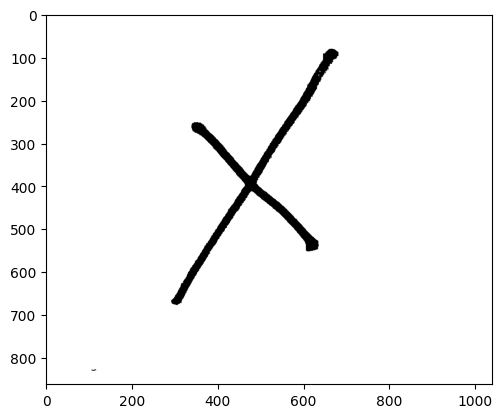

In [71]:
x1=img_f[750:1612,0:1040]
plt.imshow(x1,cmap="gray")

In [72]:
circle=img_f[767:1650,1153:2047]


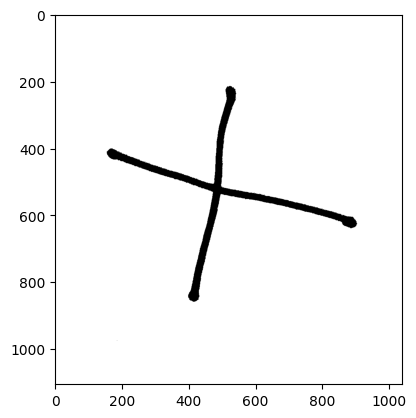

In [55]:
x2=img_f[2734:3840,0:1040]
plt.imshow(x2,cmap="gray")

In [75]:
o3=img_f[1800:2600,0:1070]

In [74]:
o4=img_f[725:1700,2200:2901]

In [76]:
o5=img_f[2750:3699,2200:2878]

In [59]:
#get corners 
#get list of coordinates and pass into get_subs

def get_subs():
#     return list of subimages in row major order
    pass

In [60]:
# subs_list=get_subs(coor_list)
subs_list=[x1,x2,o3,o4,o5]

In [61]:
def my_ex(img):

    h,w=img.shape
    hn=int(h/2)
    wn=int(w/2)
    ex=0
    img2 = img.copy()
    template = cv2.imread('utemplate.jpg',0)
    w, h = template.shape[::-1]
    # methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED']
    methods = ['cv2.TM_CCOEFF_NORMED']
    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv2.rectangle(img,top_left, bottom_right, 0, 2)
        print(top_left)
        print(bottom_right)

        if(top_left[0]<hn and bottom_right[0]>hn and top_left[1]<wn and bottom_right[1]>wn):
            print("YES")
            ex=1
        else:
            print("NO")
            ex=0

        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()
        
    return ex
    

In [62]:
result=[]

(184, 354)
(1542, 1886)
YES


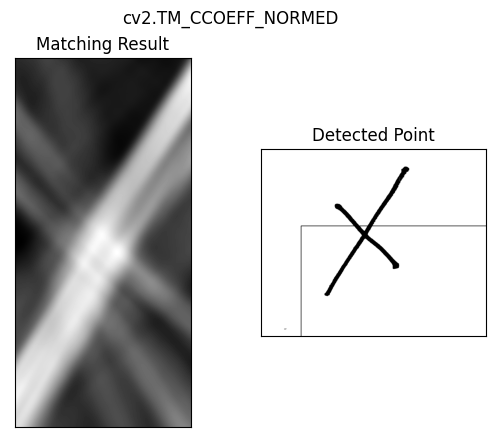

(27, 314)
(1385, 1846)
YES


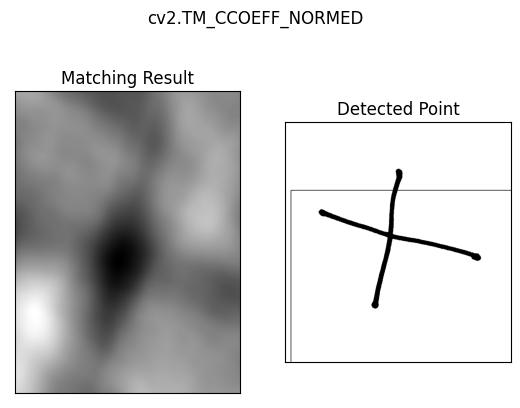

(113, 701)
(1471, 2233)
NO


(343, 557)
(1701, 2089)
NO


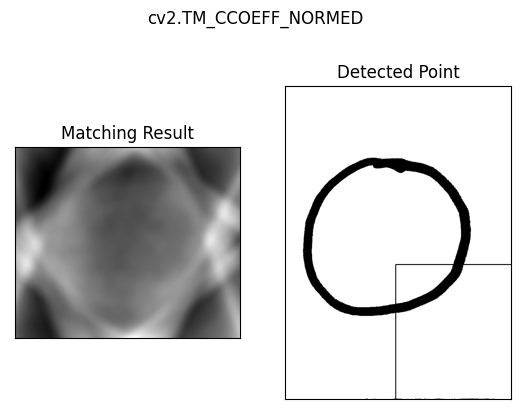

(374, 577)
(1732, 2109)
NO


[1, 1, 0, 0, 0]


In [63]:
for sub in subs_list:
    result.append(my_ex(sub))

print(result)